# Importing the Libraries and the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(plt.style.available)
plt.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
raw_df = pd.read_csv('IRIS.csv')
raw_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Exploratory Data Analysis

In [4]:
raw_df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
raw_df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Data Cleaning

### Duplicated or Missing Values

In [7]:
# Checking for any duplicated values
raw_df.duplicated().sum()

3

In [8]:
# Only 3 Duplicated rows can be excluded from the Analysis
raw_df = raw_df.drop_duplicates()

In [9]:
# Checking for null values -> 
raw_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Outliers

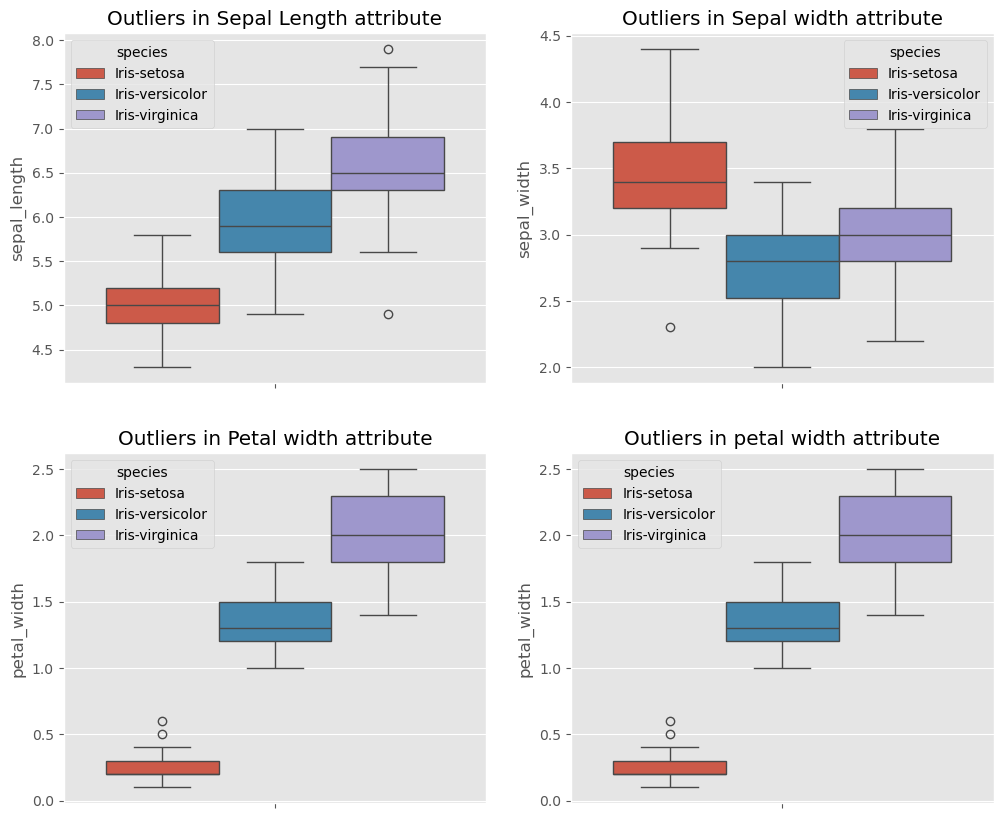

In [10]:
# Checking for Outliers using seaborn's boxplots
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.boxplot(y='sepal_length', hue='species', data=raw_df)
plt.title("Outliers in Sepal Length attribute")

plt.subplot(2, 2, 2)
sns.boxplot(y='sepal_width',  hue='species',data=raw_df)
plt.title("Outliers in Sepal width attribute")

plt.subplot(2, 2, 3)
sns.boxplot(y='petal_width',  hue='species',data=raw_df)
plt.title("Outliers in Petal width attribute")

plt.subplot(2, 2, 4)
sns.boxplot(y='petal_width',  hue='species',data=raw_df)
plt.title("Outliers in petal width attribute")

plt.show()

There are Minimum to no Outliers in the Dataset.<br>
Therfore the outliers can be ignored.

### Label Encoding 

In [11]:
# Encoding the Categorical Variables ->
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = raw_df.copy()
df['species'] = le.fit_transform(df['species'])
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data Visualization

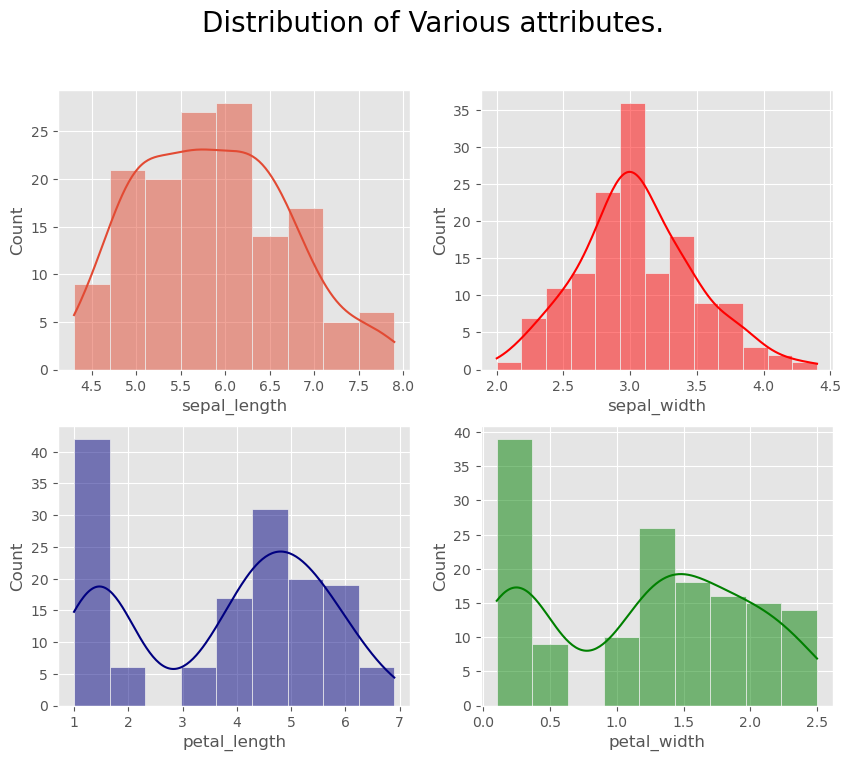

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

plt1 = sns.histplot(raw_df['sepal_length'], kde=True, ax = axs[0,0])

plt2 = sns.histplot(raw_df['sepal_width'], kde=True, ax = axs[0,1], color='red')

plt3 = sns.histplot(raw_df['petal_length'], kde=True, ax = axs[1,0], color='navy')

plt4 = sns.histplot(raw_df['petal_width'], kde=True, ax = axs[1,1], color='green')

plt.suptitle("Distribution of Various attributes.", fontsize=20)
plt.show()

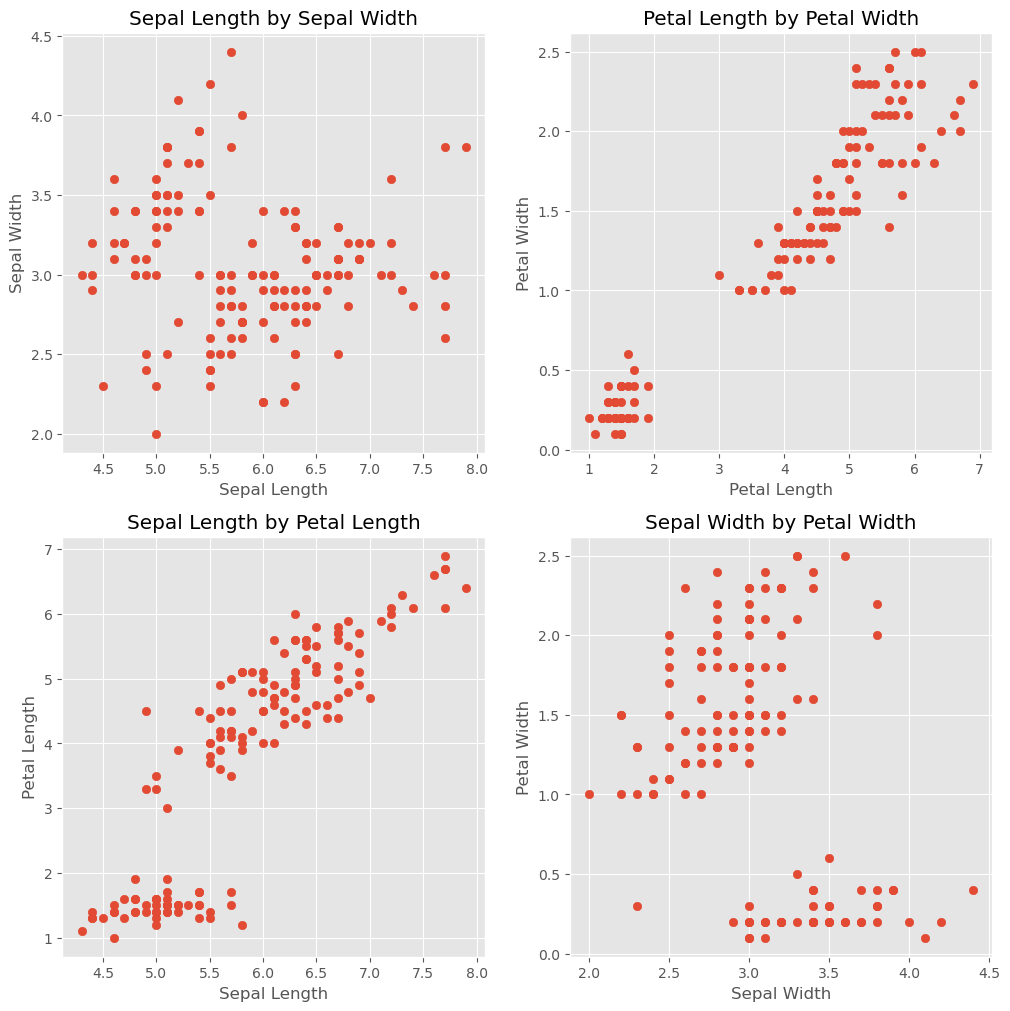

In [14]:
# Scatter plots showing the relationship between various numerical variables
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.scatter(raw_df['sepal_length'], raw_df['sepal_width'])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length by Sepal Width")

plt.subplot(2,2,2)
plt.scatter(raw_df['petal_length'], raw_df['petal_width'])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Petal Length by Petal Width")

plt.subplot(2,2,3)
plt.scatter(raw_df['sepal_length'], raw_df['petal_length'])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Sepal Length by Petal Length")

plt.subplot(2,2,4)
plt.scatter(raw_df['sepal_width'], raw_df['petal_width'])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.title("Sepal Width by Petal Width")

# plt.tight_layout()
plt.show()

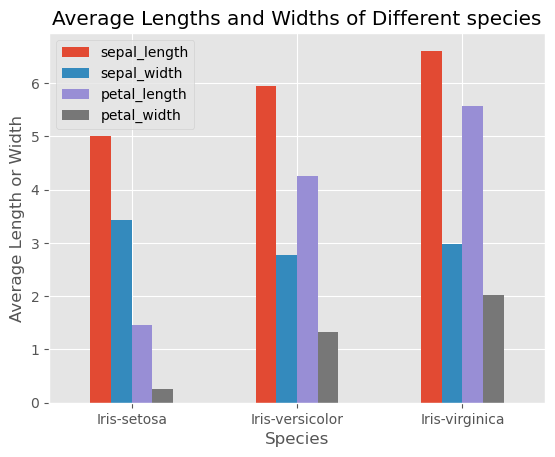

In [15]:
# Average Sepal and petal measurments for different species
df_by_species = raw_df.groupby(by=['species']).mean()
df_by_species.plot(kind='bar')
plt.title("Average Lengths and Widths of Different species")
plt.xlabel("Species")
plt.ylabel("Average Length or Width")
plt.xticks(rotation=0)
plt.show()

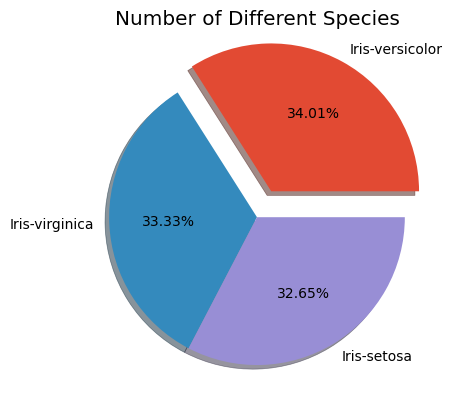

In [16]:
# No. of entries in each species
raw_df['species'].value_counts().plot(kind='pie', explode=[0.2, 0, 0], shadow=True, autopct='%.2f%%')
plt.ylabel("")
plt.title("Number of Different Species")
plt.show()

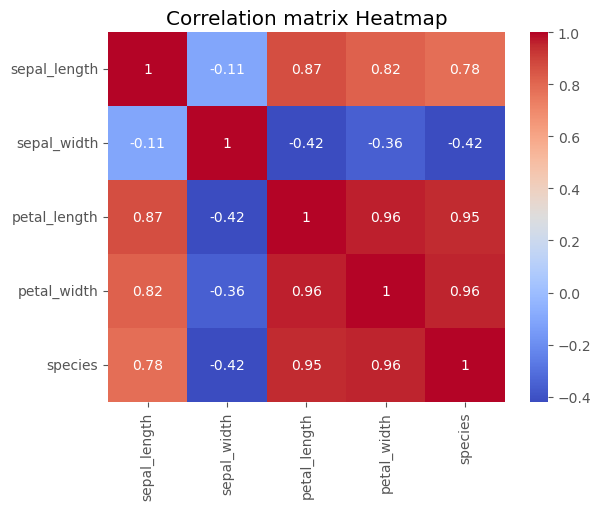

In [17]:
# Analysing correlations using seaborn's heatmap
df_corr = df.corr()

sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title("Correlation matrix Heatmap")
plt.show()

# Data Preprocessing

In [18]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Defining Inputs and the Target

In [19]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Train test split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train.shape

(117, 4)

In [22]:
y_train.shape

(117,)

# Model Training and Testing

In [23]:
# Accuracy Method.
from sklearn.metrics import accuracy_score, confusion_matrix
def accuracy(X, y, model):
    '''This Method calculates accuracy score and Confusion matrix based on 
    given inputs and target.'''
    y_pred = model.predict(X)
    print(confusion_matrix(y_pred, y))
    print(accuracy_score(y_pred, y))

In [24]:
# K-Fold Cross Validation.
from sklearn.model_selection import cross_val_score
def k_fold_cross_val(model, X, y):
    '''This Method is used to calculate the mean accuracy and the std.dev. using 
    k Fold cross validation.'''
    accuracies = cross_val_score(estimator=model, X=X, y=y, cv=10)
    print("Mean Accuracy: ", (accuracies.mean()*100).round(2), "%")
    print("Standard Deviation: ", (accuracies.std()*100).round(2), "%")

## Logistic Regression

In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Accuracy on the Trainig set.
accuracy(X_train, y_train, lr)

[[37  0  0]
 [ 0 37  1]
 [ 0  3 39]]
0.9658119658119658


In [27]:
# Accuracy on the Test Set.
X_test = scaler.fit_transform(X_test)
accuracy(X_test, y_test, lr)

[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]
1.0


In [28]:
k_fold_cross_val(lr, X_train, y_train)

Mean Accuracy:  94.85 %
Standard Deviation:  5.63 %


## K-Nearest Neighbours

In [29]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
# Training accuracy.
accuracy(X_train, y_train, knn)

[[37  0  0]
 [ 0 38  2]
 [ 0  2 38]]
0.9658119658119658


In [31]:
# Test accuracy
X_test = scaler.fit_transform(X_test)
accuracy(X_test, y_test, knn)

[[11  0  0]
 [ 0  9  0]
 [ 0  1  9]]
0.9666666666666667


In [32]:
k_fold_cross_val(knn, X_train, y_train)

Mean Accuracy:  96.52 %
Standard Deviation:  4.27 %


## Support Vector Classification

In [33]:
# Support vector classifier
from sklearn.svm import SVC
svc = SVC(kernel='rbf', random_state=0)
svc.fit(X_train, y_train)

SVC(random_state=0)

In [34]:
accuracy(X_train, y_train, svc)

[[37  0  0]
 [ 0 37  1]
 [ 0  3 39]]
0.9658119658119658


In [35]:
X_test = scaler.fit_transform(X_test)
accuracy(X_test, y_test, svc)

[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]
1.0


In [36]:
k_fold_cross_val(svc, X_train, y_train)

Mean Accuracy:  94.77 %
Standard Deviation:  6.98 %


## Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [38]:
accuracy(X_train, y_train, rfc)

[[37  0  0]
 [ 0 40  0]
 [ 0  0 40]]
1.0


In [39]:
X_test = scaler.fit_transform(X_test)
accuracy(X_test, y_test, rfc)

[[11  0  0]
 [ 0 10  1]
 [ 0  0  8]]
0.9666666666666667


In [40]:
k_fold_cross_val(rfc, X_train, y_train)

Mean Accuracy:  94.85 %
Standard Deviation:  4.22 %


# Conclusions
#### Logistic Regression
- Training Accuracy: 96.5% <br>
- Test Accuracy: 100.0%
#### KNN
- Training Accuracy: 96.5% <br>
- Test Accuracy: 96.6%
#### Support Vector Classifier
- Training Accuracy: 96.5% <br> 
- Test Accuracy: 100.0%
#### Random Forest Classifier
- Training Accuracy: 100.0% <br>
- Test Accuracy: 96.6%

`All the models have almost similar performances with a mean test accuracy of 98%`

## <h1 align='center'>Thank You!</h1>